In [1]:
from scipy.cluster import hierarchy
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import ripser
import dionysus

### Persistent homology of a noisy circle
One can try a slightly more non-trivial example to explore what these things look like. In this case, a few shortlived higher order homology groups arise, which is weird...

[Text(0.5, 1.0, 'data points'),
 Text(0.5, 0, 'x coord'),
 Text(0, 0.5, 'y coord')]

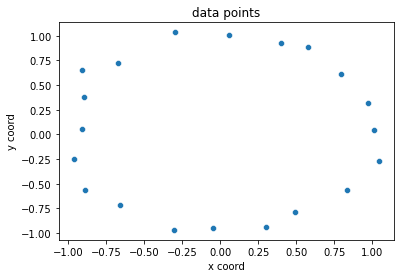

In [2]:
n_points = 20
phases = np.arange(n_points)*2*np.pi/n_points
radius = 1.0
noise_magnitude = 0.1
circle_points = np.array(list(zip(radius * np.cos(phases), radius * np.sin(phases))))
np.random.seed(0)
noisy_circle_points = circle_points + 2.0 * noise_magnitude * (np.random.random((n_points,2))-0.5)

sns.scatterplot(
    x=[x[0] for x in noisy_circle_points], y=[x[1] for x in noisy_circle_points]
).set(
    title='data points', xlabel='x coord', ylabel='y coord'
)

Rips(maxdim=10, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


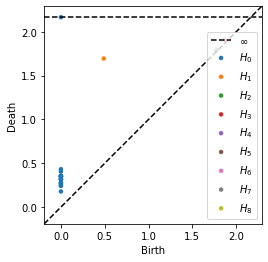

In [3]:
rips = ripser.Rips(maxdim=10)
diagrams = rips.fit_transform(np.array(noisy_circle_points))
rips.plot(diagrams)

### Persistent homology of intersecting circles



[Text(0.5, 1.0, 'data points'),
 Text(0.5, 0, 'x coord'),
 Text(0, 0.5, 'y coord')]

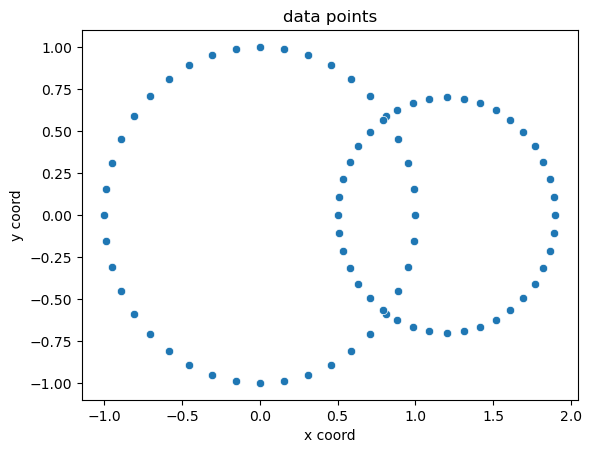

In [9]:
n_points = 40
phases = np.arange(n_points)*2*np.pi/n_points
(x0_a, y0_a, r_a) = (0.0, 0.0, 1.0)
(x0_b, y0_b, r_b) = (1.2, 0.0, 0.7)
two_circle_points = list(zip(x0_a + r_a * np.cos(phases), y0_a + r_a * np.sin(phases))) + list(zip(x0_b + r_b * np.cos(phases), y0_b + r_b * np.sin(phases)))
two_circle_points = np.array(two_circle_points)
sns.scatterplot(
    x=[x[0] for x in two_circle_points], y=[x[1] for x in two_circle_points]
).set(
    title='data points', xlabel='x coord', ylabel='y coord'
)

Three proper H1s are obtained for each 'hole' in the data. There is also a spurious shortlived one on the diagonal...

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


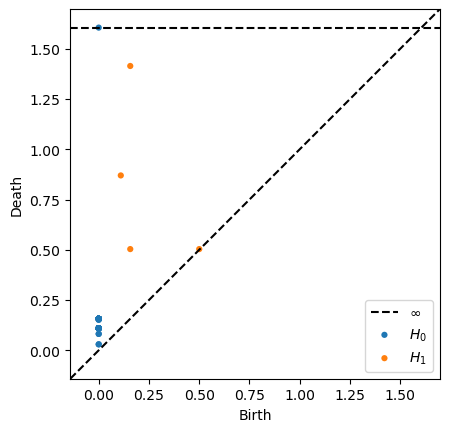

In [24]:
rips = ripser.Rips(maxdim=1)
diagrams = rips.fit_transform(two_circle_points)
rips.plot(diagrams)

Looking at the birth and death cluster distances of these H1s, 

In [25]:
ripser.ripser(two_circle_points)['dgms'][1]

array([[0.5       , 0.50343543],
       [0.1569182 , 0.50343543],
       [0.1569182 , 1.41421354],
       [0.10984273, 0.8697843 ]])